# 从全连接层到卷积

*卷积神经网络*（convolutional neural networks，CNN）是机器学习利用自然图像中一些已知结构的创造性方法。

## 不变性

由于沃尔多潜藏的地方并不取决于它的样子。我们可以使用一个“沃尔多检测器”扫描图像，该检测器将图像分成数个小方片，并为每个方片包含沃尔多的可能性打分。而卷积神经网络将“空间不变性”的概念系统化，用较少参数来学习有用的特征。

1. 平移不变性：不管出现在图像中的哪个位置，神经网络的底层应该对相同的图像区域做出类似的响应。这个原理即为“平移不变性”。
1. 局部性：神经网络的底层应该只探索输入图像中的局部区域，而不考虑图像远处区域的内容，这就是“局部性”原则。最终，这些局部特征可以融会贯通，在整个图像级别上做出预测。

让我们看看这是如何转化为数学表示的。

## 限制多层感知机

首先，假设以二维图像 $\mathbf{X}$ 作为输入，那么我们多层感知机的隐藏表示 $\mathbf{H}$ 在数学上是一个矩阵，在代码中表示为二维张量。
其中 $\mathbf{X}$ 和 $\mathbf{H}$ 具有相同的形状。
我们可以认为，不仅输入有空间结构，隐藏表示也应该有空间结构。
我们用  $[\mathbf{X}]_{i, j}$ 和 $[\mathbf{H}]_{i, j}$ 分别表示输入图像和隐藏表示中的位置($i$, $j$)处的像素。

为了使每个输入像素都有神经元处理，我们将参数从权重矩阵（如同我们先前在多层感知机中所做的那样）替换为四阶权重张量 $\mathsf{W}$。假设 $\mathbf{U}$ 包含偏置参数，我们可以将全连接层表示为

$$\begin{aligned} \left[\mathbf{H}\right]_{i, j} &= [\mathbf{U}]_{i, j} + \sum_k \sum_l[\mathsf{W}]_{i, j, k, l}  [\mathbf{X}]_{k, l}\\ &=  [\mathbf{U}]_{i, j} +
\sum_a \sum_b [\mathsf{V}]_{i, j, a, b}  [\mathbf{X}]_{i+a, j+b}.\end{aligned}$$

其中，从 $\mathsf{W}$ 到 $\mathsf{V}$ 的转换只是形式的转换，因为在两个四阶张量中，系数之间存在一对一的对应关系。
我们只需重新索引下标 $(k, l)$，使 $k = i+a$、$l = j+b$， 由此 $[\mathsf{V}]_{i, j, a, b} = [\mathsf{W}]_{i, j, i+a, j+b}$。
这里的索引 $a$ 和 $b$ 覆盖了正偏移和负偏移。
对于隐藏表示$[\mathbf{H}]_{i, j}$中的任何给定位置（$i$, $j$），我们通过对 $x$ 中以 $(i, j)$ 为中心的像素，以 $[\mathsf{V}]{i, j, a, b}$ 作为权重进行加权求和。

### 平移不变性

现在让我们用上面的第一个原则：**平移不变性。**
这意味着输入 $\mathbf{X}$ 中的移位，应该仅与隐藏表示 $\mathbf{H}$ 中的移位相关。也就是说， $\mathsf{V}$ 和 $\mathbf{U}$ 实际上不依赖于 $(i, j)$ 的值，即 $[\mathsf{V}]_{i, j, a, b} = [\mathbf{V}]_{a, b}$。并且  $\mathbf{U}$ 是一个常数，比如 $u$。因此，我们可以简化 $\mathbf{H}$ 定义为：


$$[\mathbf{H}]_{i, j} = u + \sum_a\sum_b [\mathbf{V}]_{a, b} [\mathbf{X}]_{i+a, j+b}.$$


这就是卷积。我们使用系数 $[\mathbf{V}]_{a, b}$ 对位置 $(i, j)$ 附近的像素 $(i+a, j+b)$ 进行加权。
注意，$[\mathbf{V}]_{a, b}$ 的参数比 $[\mathsf{V}]_{i, j, a, b}$ 少很多，因为前者不再依赖于图像中的位置。

### 局部性

现在引用上述的第二个原则：局部性。如上所述，为了收集用来训练参数 $[\mathbf{H}]_{i, j}$ 的相关信息，我们不应偏离到距 $(i, j)$ 很远的地方。这意味着在 $|a|> \Delta$ 或 $|b| > \Delta$ 的范围之外，我们可以设置 $[\mathbf{V}]_{a, b} = 0$。由此，我们可以将参数 $[\mathbf{H}]_{i, j}$ 重写为

$$[\mathbf{H}]_{i, j} = u + \sum_{a = -\Delta}^{\Delta} \sum_{b = -\Delta}^{\Delta} [\mathbf{V}]_{a, b}  [\mathbf{X}]_{i+a, j+b}.$$


简而言之，上式是一个卷积层，而卷积神经网络是包含卷积层的一类特殊的神经网络。
在深度学习研究社区中， $\mathbf{V}$ 被称为 *卷积核* （convolution kernel） 或者  *滤波器* （filter），是可学习的权重。
当图像处理的局部区域很小时，卷积神经网络与多层感知机的训练差异可能是巨大的：以前，多层感知机可能需要数十亿个参数来表示，而现在卷积神经网络通常只需要几百个参数，而且不需要改变输入或隐藏表示的维数。
以上所有的权重学习都依赖于归纳偏置，当这种偏置与实际情况相符时，我们就可以得到有效的模型，这些模型能很好地推广到不可见的数据中。
但如果这些假设与实际情况不符，比如当图像不满足平移不变时，我们的模型可能难以拟合。

## 卷积

在进一步讨论之前，我们先简要回顾一下为什么上面的操作被称为卷积。在数学中，两个函数（比如 $f, g: \mathbb{R}^d \to \mathbb{R}$）之间的*卷积*被定义为

$$(f * g)(\mathbf{x}) = \int f(\mathbf{z}) g(\mathbf{x}-\mathbf{z}) d\mathbf{z}.$$

也就是说，卷积是测量 $f$ 和 $g$ 之间（把函数“翻转”并移位 $\mathbf{x}$ 时）的重叠。
当我们有离散对象时（即定义域为 $\mathbb{Z}$ ），积分就变成求和，我们得到以下定义：

$$(f * g)(i) = \sum_a f(a) g(i-a).$$

对于二维张量，则为 $f$ 在 $(a, b)$ 和 $g$ 在 $(i-a, j-b)$ 上的对应和：

$$(f * g)(i, j) = \sum_a\sum_b f(a, b) g(i-a, j-b).$$


这看起来类似于，但有一个主要区别：这里不是使用 $(i+a, j+b)$ ，而是使用差值。然而，这种区别是可以化简的，因为我们总是可以匹配局部性里的式子和上式之间的符号。我们在局部性里的式子中的原始定义更正确地描述了*互相关*。我们将在下一节中讨论这一问题。

## “沃尔多在哪里” 回顾

回到上面的“沃尔多在哪里”游戏，让我们看看它到底是什么样子。卷积层根据滤波器 $\mathsf{V}$ 选取给定大小的窗口，并加权处理图片，如 :numref:`fig_waldo_mask` 中所示。我们的目标是学习一个模型，以便探测出在“沃尔多”最可能出现的地方。

![发现沃尔多。](../img/waldo-mask.jpg)
:width:`400px`
:label:`fig_waldo_mask`


### 通道
:label:`subsec_why-conv-channels`

然而这种方法有一个问题：我们忽略了图像是由三原色（红色、绿色和蓝色）的组成。
实际上，图像不是二维张量，而是一个由高度、宽度和颜色组成的三维张量，例如形状为 $1024 \times 1024 \times 3$ 的像素。
因此，我们将 $\mathsf{X}$ 索引为 $[\mathsf{X}]_{i, j, k}$ 。由此卷积相应地调整为 $[\mathsf{V}]_{a,b,c}$ ，而不是 $[\mathbf{V}]_{a,b}$ 。

此外，由于输入图像是三维的，我们的隐藏表示 $\mathsf{H}$ 也是一个三维张量。
因此，我们可以把隐藏表示想象为一系列具有二维张量的 *通道* （channel）。
这些通道有时也被称为 *特征映射* （feature maps），因为每一层都向后续层提供一组空间化的学习特征。
在靠近输入的底层，一些通道专门识别边，而其他通道专门识别纹理。

为了支持输入 $\mathsf{X}$ 和隐藏表示 $\mathsf{H}$ 中的多个通道，我们可以在 $\mathsf{V}$ 中添加第四个坐标，即 $[\mathsf{V}]_{a, b, c, d}$ 。综上所述，

$$[\mathsf{H}]_{i,j,d} = \sum_{a = -\Delta}^{\Delta} \sum_{b = -\Delta}^{\Delta} \sum_c [\mathsf{V}]_{a, b, c, d} [\mathsf{X}]_{i+a, j+b, c},$$
:eqlabel:`eq_conv-layer-channels`

其中隐藏表示 $\mathsf{H}$ 中的 $d$ 索引表示输出通道，而随后的输出将继续以三维张量 $\mathsf{H}$ 作为输入进入下一个卷积层。
所以， :eqref:`eq_conv-layer-channels` 可以定义具有多个通道的卷积层，而其中 $\mathsf{V}$ 是该卷积层的权重。

然而，仍有许多问题亟待解决。
例如，图像中是否到处都有存在沃尔多的可能？如何有效地计算输出层？如何选择适当的激活函数？为了训练有效的网络，如何做出合理的网络设计选择？我们将在本章的其它部分讨论这些问题。



## 小结

- 图像的平移不变性使我们可以以相同的方式处理局部图像。
- 局部性意味着计算相应的隐藏表示只需一小部分局部图像像素。
- 在图像处理中，卷积层通常比全连接层需要更少的参数。
- 卷积神经网络（CNN）是一类特殊的神经网络，它可以包含多个卷积层。
- 多个输入和输出通道使模型在每个空间位置可以获取图像的多方面特征。

# 图像卷积

上节我们解析了卷积层的原理，现在我们看看它的实际应用。由于卷积神经网络的设计是用于探索图像数据，本节我们将以图像为例。



## 互相关运算






严格地说，卷积层所表达的运算可以被更准确地描述为 *互相关运算* (cross-correlation)。
根据 :numref:`sec_why-conv` 中的描述，在卷积层中，输入张量和核张量通过互相关运算产生输出张量。

首先，我们暂时忽略通道（第三维）这一情况，看看如何处理二维图像数据和隐藏表示。在 :numref:`fig_correlation` 中，输入是高度为 $3$ 、宽度为 $3$ 的二维张量（即形状为 $3 \times 3$ ）。卷积核的高度和宽度都是 $2$ ，而卷积核窗口（或卷积窗口）的形状由内核的高度和宽度决定（即 $2 \times 2$ ）。

![二维互相关运算。阴影部分是第一个输出元素，以及用于计算这个输出的输入和核张量元素：$0\times0+1\times1+3\times2+4\times3=19$.](http://d2l.ai/_images/correlation.svg)
:label:`fig_correlation`

在二维互相关运算中，卷积窗口从输入张量的左上角开始，从左到右、从上到下滑动。
当卷积窗口滑动到新一个位置时，包含在该窗口中的部分张量与卷积核张量进行按元素相乘，得到的张量再求和得到一个单一的标量值，由此我们得出了这一位置的输出张量值。
在如上例子中，输出张量的四个元素由二维互相关运算得到，这个输出高度为 $2$ 、宽度为 $2$ ，如下所示：

$$
0\times0+1\times1+3\times2+4\times3=19,\\
1\times0+2\times1+4\times2+5\times3=25,\\
3\times0+4\times1+6\times2+7\times3=37,\\
4\times0+5\times1+7\times2+8\times3=43.
$$

注意，输出大小略小于输入大小。这是因为卷积核的宽度和高度大于1，
而卷积核只与图像中每个大小完全适合的位置进行互相关运算。
所以，**输出大小等于输入大小 $n_h \times n_w$ 减去卷积核大小 $k_h \times k_w$，即：**

$$(n_h-k_h+1) \times (n_w-k_w+1).$$

这是因为我们需要足够的空间在图像上“移动”卷积核。稍后，我们将看到如何通过在图像边界周围填充零来有保证足够的空间来移动内核，从而保持输出大小不变。
接下来，我们在 `corr2d` 函数中实现如上过程，该函数接受输入张量 `X` 和卷积核张量  `K` ，并返回输出张量 `Y` 。


In [1]:
!pip install d2l

     |████████████████████████████████| 81kB 3.3MB/s 


In [2]:
import tensorflow as tf
from d2l import tensorflow as d2l

def corr2d(X, K):  #@save
    """计算二维互相关运算。"""
    h, w = K.shape
    Y = tf.Variable(tf.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1)))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j].assign(tf.reduce_sum(X[i:i + h, j:j + w] * K))
    return Y

通过 :numref:`fig_correlation` 的输入张量 `X` 和卷积核张量 `K` ，我们来验证一下上述二维互相关运算的输出。


In [3]:
X = tf.constant([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
K = tf.constant([[0.0, 1.0], [2.0, 3.0]])
corr2d(X, K)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[19., 25.],
       [37., 43.]], dtype=float32)>

## 卷积层

卷积层对输入和卷积核权重进行互相关运算，并在添加标量偏置之后产生输出。
所以，***卷积层中的两个被训练的参数是卷积核权重和标量偏置。***
就像我们之前随机初始化全连接层一样，在训练基于卷积层的模型时，我们也随机初始化卷积核权重

基于上面定义的 `corr2d` 函数实现二维卷积层。在 `__init__` 构造函数中，将 `weight` 和 `bias` 声明为两个模型参数。前向传播函数调用 `corr2d` 函数并添加偏置。


In [4]:
class Conv2D(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()

    def build(self, kernel_size):
        initializer = tf.random_normal_initializer()
        self.weight = self.add_weight(name='w', shape=kernel_size,
                                      initializer=initializer)
        self.bias = self.add_weight(name='b', shape=(1,),
                                    initializer=initializer)

    def call(self, inputs):
        return corr2d(inputs, self.weight) + self.bias

高度和宽度分别为 $h$ 和 $w$的卷积核可以被称为 $h \times w$ 卷积或 $h \times w$ 卷积核。
我们也将带有 $h \times w$ 卷积核的卷积层称为 $h \times w$ 卷积层


## 图像中目标的边缘检测

如下是卷积层的一个简单应用：通过找到像素变化的位置来检测图像中不同颜色的边缘。
首先，我们构造一个 $6\times 8$ 像素的黑白图像。中间四列为黑色（$0$），其余像素为白色（$1$）。


In [5]:
X = tf.Variable(tf.ones((6, 8)))
X[:, 2:6].assign(tf.zeros(X[:, 2:6].shape))
X

<tf.Variable 'Variable:0' shape=(6, 8) dtype=float32, numpy=
array([[1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.]], dtype=float32)>

接下来，我们构造一个高度为 $1$ 、宽度为 $2$ 的卷积核 `K` 。当进行互相关运算时，如果水平相邻的两元素相同，则输出为零，否则输出为非零。


In [6]:
K = tf.constant([[1.0, -1.0]])

现在，我们对参数 `X` （输入）和 `K` （卷积核）执行互相关运算。
如下所示，输出 `Y` 中的 $1$ 代表从白色到黑色的边缘， $-1$ 代表从黑色到白色的边缘，其他情况的输出为 $0$


In [7]:
Y = corr2d(X, K)
Y

<tf.Variable 'Variable:0' shape=(6, 7) dtype=float32, numpy=
array([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -1.,  0.]], dtype=float32)>

现在我们将输入的二维图像转置，再进行如上的互相关运算。
其输出如下，之前检测到的垂直边缘消失了。
不出所料，这个卷积核 `K` 只可以检测垂直边缘，无法检测水平边缘。


In [8]:
corr2d(tf.transpose(X), K)

<tf.Variable 'Variable:0' shape=(8, 5) dtype=float32, numpy=
array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)>

## 学习卷积核

如果我们只需寻找黑白边缘，那么以上 `[1, -1]` 的边缘检测器足以。然而，当有了更复杂数值的卷积核，或者连续的卷积层时，我们不可能手动设计过滤器。那么我们是否可以学习由  `X` 生成 `Y` 的卷积核呢？

现在让我们看看是否可以通过仅查看“输入-输出”对来了解由 `X` 生成 `Y` 的卷积核。
我们先构造一个卷积层，并将其卷积核初始化为随机张量。接下来，在每次迭代中，我们比较  `Y` 与卷积层输出的平方误差，然后计算梯度来更新卷积核。为了简单起见，我们在此使用内置的二维卷积层，并忽略偏置。


In [9]:
# 构造一个二维卷积层，它具有1个输出通道和形状为（1，2）的卷积核
conv2d = tf.keras.layers.Conv2D(1, (1, 2), use_bias=False)

# 这个二维卷积层使用四维输入和输出格式（批量大小、通道、高度、宽度），
# 其中批量大小和通道数都为1
X = tf.reshape(X, (1, 6, 8, 1))
Y = tf.reshape(Y, (1, 6, 7, 1))

Y_hat = conv2d(X)
for i in range(10):
    with tf.GradientTape(watch_accessed_variables=False) as g:
        g.watch(conv2d.weights[0])
        Y_hat = conv2d(X)
        l = (abs(Y_hat - Y))**2
        # 迭代卷积核
        update = tf.multiply(3e-2, g.gradient(l, conv2d.weights[0]))
        weights = conv2d.get_weights()
        weights[0] = conv2d.weights[0] - update
        conv2d.set_weights(weights)
        if (i + 1) % 2 == 0:
            print(f'batch {i+1}, loss {tf.reduce_sum(l):.3f}')

batch 2, loss 12.536
batch 4, loss 2.955
batch 6, loss 0.845
batch 8, loss 0.285
batch 10, loss 0.106


在 $10$ 次迭代之后，误差已经降到足够低。现在我们来看看我们所学的卷积核的权重张量。


In [10]:
tf.reshape(conv2d.get_weights()[0], (1, 2))

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[ 0.95186746, -1.0169064 ]], dtype=float32)>

细心的你一定会发现，我们学习到的卷积核权重非常接近我们之前定义的卷积核 `K` 。


## 互相关和卷积

回想一下我们在 :numref:`sec_why-conv` 中观察到的互相关和卷积运算之间的对应关系。
为了得到严格*卷积*运算输出，我们需要执行 :eqref:`eq_2d-conv-discrete` 中定义的严格卷积运算，而不是互相关运算。
幸运的是，它们差别不大，我们只需水平和垂直翻转二维卷积核张量，然后对输入张量执行*互相关*运算。

值得注意的是，由于卷积核是从数据中学习到的，因此无论这些层执行严格的卷积运算还是互相关运算，卷积层的输出都不会受到影响。
为了说明这一点，假设卷积层执行*互相关*运算并学习 :numref:`fig_correlation` 中的卷积核，该卷积核在这里由矩阵 $\mathbf{K}$ 表示。
假设其他条件不变，当这个层执行严格的*卷积*时，学习的卷积核 $\mathbf{K}'$ 在水平和垂直翻转之后将与 $\mathbf{K}$ 相同。
也就是说，当卷积层对 :numref:`fig_correlation` 中的输入和 $\mathbf{K}'$ 执行严格*卷积*运算时，将得到与互相关运算 :numref:`fig_correlation` 中相同的输出。

为了与深度学习文献中的标准术语保持一致，我们将继续把“互相关运算”称为卷积运算，尽管严格地说，它们略有不同。
此外，对于卷积核张量上的权重，我们称其为*元素*。










## 特征映射和感受野

如在 :numref:`subsec_why-conv-channels` 中所述， :numref:`fig_correlation` 中输出的卷积层有时被称为 *特征映射* （Feature Map），因为它可以被视为一个输入映射到下一层的空间维度的转换器。
在CNN中，对于某一层的任意元素 $x$ ，其 *感受野* （Receptive Field）是指在前向传播期间可能影响 $x$ 计算的所有元素（来自所有先前层）。

注意，感受野的覆盖率可能大于某层输入的实际区域大小。让我们用 :numref:`fig_correlation` 为例来解释感受野：
给定 $2 \times 2$ 卷积核，阴影输出元素值 $19$ 的接收域是输入阴影部分的四个元素。
假设之前输出为 $\mathbf{Y}$ ，其大小为 $2 \times 2$ ，现在我们在其后附加一个卷积层，该卷积层以 $\mathbf{Y}$ 为输入，输出单个元素 $z$。
在这种情况下， $\mathbf{Y}$ 上的 $z$ 的接收字段包括 $\mathbf{Y}$ 的所有四个元素，而输入的感受野包括最初所有九个输入元素。
因此，当一个特征图中的任意元素需要检测更广区域的输入特征时，我们可以构建一个更深的网络。

## 小结

* 二维卷积层的核心计算是二维互相关运算。最简单的形式是，对二维输入数据和卷积核执行互相关操作，然后添加一个偏置。
* 我们可以设计一个卷积核来检测图像的边缘。
* 我们可以从数据中学习卷积核的参数。
* 学习卷积核时，无论用严格卷积运算或互相关运算，卷积层的输出不会受太大影响。
* 当需要检测输入特征中更广区域时，我们可以构建一个更深的卷积网络。

# 填充和步幅




在前面的例子 :numref:`fig_correlation` 中，输入的高度和宽度都为$3$，卷积核的高度和宽度都为 $2$ ，生成的输出表征的维数为 $2\times2$。
正如我们在 :numref:`sec_conv_layer` 中所概括的那样，假设输入形状为 $n_h\times n_w$，卷积核形状为 $k_h\times k_w$，那么输出形状将是 $(n_h-k_h+1) \times (n_w-k_w+1)$。
因此，卷积的输出形状取决于输入形状和卷积核的形状。

还有什么因素会影响输出的大小呢？本节我们将介绍 *填充*（padding）和 *步幅* (stride)。假设以下情景：
- 有时，在应用了连续的卷积之后，我们最终得到的输出远小于输入大小。这是由于卷积核的宽度和高度通常大于 $1$ 所导致的。比如，一个 $240 \times 240$ 像素的图像，经过 $10$ 层 $5 \times 5$ 的卷积后，将减少到 $200 \times 200$ 像素。如此一来，原始图像的边界丢失了许多有用信息。 而*填充* 是解决此问题最有效的方法。
- 有时，我们可能希望大幅降低图像的宽度和高度。例如，如果我们发现原始的输入分辨率十分冗余。 *步幅*则可以在这类情况下提供帮助。



## 填充

如上所述，在应用多层卷积时，我们常常丢失边缘像素。
由于我们通常使用小卷积核，因此对于任何单个卷积，我们可能只会丢失几个像素。
但随着我们应用许多连续卷积层，累积丢失的像素数就多了。
解决这个问题的简单方法即为*填充*（padding）：在输入图像的边界填充元素（通常填充元素是 $0$ ）。
例如，在 :numref:`img_conv_pad` 中，我们将 $3 \times 3$ 输入填充到 $5 \times 5$，那么它的输出就增加为 $4 \times 4$。阴影部分是第一个输出元素以及用于输出计算的输入和核张量元素：
$0\times0+0\times1+0\times2+0\times3=0$。

![带填充的二维互相关。](../img/conv-pad.svg)
:label:`img_conv_pad`

通常，如果我们添加 $p_h$ 行填充（大约一半在顶部，一半在底部）和 $p_w$ 列填充（左侧大约一半，右侧半），则输出形状将为

$$(n_h-k_h+p_h+1)\times(n_w-k_w+p_w+1)。$$

这意味着输出的高度和宽度将分别增加 $p_h$ 和 $p_w$。

**在许多情况下，我们需要设置 $p_h=k_h-1$ 和 $p_w=k_w-1$，使输入和输出具有相同的高度和宽度。**
这样可以在构建网络时更容易地预测每个图层的输出形状。假设 $k_h$ 是奇数，我们将在高度的两侧填充 $p_h/2$ 行。
如果 $k_h$ 是偶数，则一种可能性是在输入顶部填充 $\lceil p_h/2\rceil$ 行，在底部填充 $\lfloor p_h/2\rfloor$ 行。同理，我们填充宽度的两侧。

卷积神经网络中卷积核的高度和宽度通常为奇数，例如 1、3、5 或 7。
选择奇数的好处是，保持空间维度的同时，我们可以在顶部和底部填充相同数量的行，在左侧和右侧填充相同数量的列。

此外，使用奇数核和填充也提供了书写上的便利。对于任何二维张量 `X`，当满足：
1. 内核的大小是奇数；
2. 所有边的填充行数和列数相同；
3. 输出与输入具有相同高度和宽度
则可以得出：输出 `Y[i, j]` 是通过以输入 `X[i, j]` 为中心，与卷积核进行互相关计算。

比如，在下面的例子中，我们创建一个高度和宽度为3的二维卷积层，并在所有侧边填充 1 个像素。给定高度和宽度为 $8$ 的输入，则输出的高度和宽度也是 8。


In [11]:
import tensorflow as tf

# 为了方便起见，我们定义了一个计算卷积层的函数。
# 此函数初始化卷积层权重，并对输入和输出提高和缩减相应的维数
def comp_conv2d(conv2d, X):
    # 这里的（1，1）表示批量大小和通道数都是1
    X = tf.reshape(X, (1,) + X.shape + (1,))
    Y = conv2d(X)
    # 省略前两个维度：批量大小和通道
    return tf.reshape(Y, Y.shape[1:3])

# 请注意，这里每边都填充了1行或1列，因此总共添加了2行或2列
conv2d = tf.keras.layers.Conv2D(1, kernel_size=3, padding='same') # 卷积核个数，卷积核形状
# 补0策略，为“valid”, “same”。“valid”代表只进行有效的卷积，即对边界数据不处理。
# “same”代表保留边界处的卷积结果，通常会导致输出shape与输入shape相同。
X = tf.random.uniform(shape=(8, 8))
comp_conv2d(conv2d, X).shape

TensorShape([8, 8])

当卷积内核的高度和宽度不同时，我们可以填充不同的高度和宽度，使输出和输入具有相同的高度和宽度。在如下示例中，我们使用高度为 $5$，宽度为 $3$ 的卷积核，高度和宽度两边的填充分别为 $2$ 和 $1$。


In [12]:
conv2d = tf.keras.layers.Conv2D(1, kernel_size=(5, 3), padding='valid')
comp_conv2d(conv2d, X).shape

TensorShape([4, 6])

## 步幅

在计算互相关时，卷积窗口从输入张量的左上角开始，向下和向右滑动。
在前面的例子中，我们默认每次滑动一个元素。
但是，有时候为了高效计算或是缩减采样次数，卷积窗口可以跳过中间位置，每次滑动多个元素。

我们将每次滑动元素的数量称为 *步幅* （stride）。到目前为止，我们只使用过高度或宽度为 $1$ 的步幅，那么如何使用较大的步幅呢？
:numref:`img_conv_stride` 是垂直步幅为 $3$，水平步幅为 $2$ 的二维互相关运算。
着色部分是输出元素以及用于输出计算的输入和内核张量元素：$0\times0+0\times1+1\times2+2\times3=8$、$0\times0+6\times1+0\times2+0\times3=6$。

如何计算输出中第一列的第二个元素呢？如图所示，卷积窗口向下滑动三行、向右滑动两列。但是，当卷积窗口继续向右滑动两列时，没有输出，因为输入元素无法填充窗口（除非我们添加另一列填充）。

![垂直步幅为 $3$，水平步幅为 $2$ 的二维互相关运算。](../img/conv-stride.svg)
:label:`img_conv_stride`

通常，当垂直步幅为 $s_h$ 、水平步幅为 $s_w$ 时，输出形状为

$$\lfloor(n_h-k_h+p_h+s_h)/s_h\rfloor \times \lfloor(n_w-k_w+p_w+s_w)/s_w\rfloor.$$

如果我们设置了 $p_h=k_h-1$ 和 $p_w=k_w-1$，则输出形状将简化为 $\lfloor(n_h+s_h-1)/s_h\rfloor \times \lfloor(n_w+s_w-1)/s_w\rfloor$。
更进一步，如果输入的高度和宽度可以被垂直和水平步幅整除，则输出形状将为 $(n_h/s_h) \times (n_w/s_w)$。

下面，我们将高度和宽度的步幅设置为 $2$，从而将输入的高度和宽度减半。


In [13]:
conv2d = tf.keras.layers.Conv2D(1, kernel_size=3, padding='same', strides=2)
comp_conv2d(conv2d, X).shape

TensorShape([4, 4])

接下来，看一个稍微复杂的例子。


In [14]:
conv2d = tf.keras.layers.Conv2D(1, kernel_size=(3, 5), padding='valid',
                                strides=(3, 4))
comp_conv2d(conv2d, X).shape

TensorShape([2, 1])

为了简洁起见，当输入高度和宽度两侧的填充数量分别为 $p_h$ 和 $p_w$ 时，我们称之为填充 $(p_h, p_w)$。当 $p_h = p_w = p$ 时，填充是 $p$。同理，当高度和宽度上的步幅分别为 $s_h$ 和 $s_w$ 时，我们称之为步幅 $(s_h, s_w)$。当时的步幅为 $s_h = s_w = s$ 时，步幅为 $s$。默认情况下，填充为 0，步幅为 1。在实践中，我们很少使用不一致的步幅或填充，也就是说，我们通常有 $p_h = p_w$ 和 $s_h = s_w$。


## 小结

* 填充可以增加输出的高度和宽度。这常用来使输出与输入具有相同的高和宽。
* 步幅可以减小输出的高和宽，例如输出的高和宽仅为输入的高和宽的 $1/n$（ $n$ 是一个大于 $1$ 的整数）。
* 填充和步幅可用于有效地调整数据的维度。

# 多输入多输出通道
:label:`sec_channels`

虽然我们在 :numref:`subsec_why-conv-channels` 中描述了构成每个图像的多个通道和多层卷积层。例如彩色图像具有标准的 RGB 通道来指示红、绿和蓝。
但是到目前为止，我们仅展示了单个输入和单个输出通道的简化例子。
这使得我们可以将输入、卷积核和输出看作二维张量。

当我们添加通道时，我们的输入和隐藏的表示都变成了三维张量。例如，每个RGB输入图像具有 $3\times h\times w$ 的形状。我们将这个大小为 $3$ 的轴称为 *通道*（channel） 维度。在本节中，我们将更深入地研究具有多输入和多输出通道的卷积核。


## 多输入通道

当输入包含多个通道时，需要构造一个与输入数据具有相同输入通道数目的卷积核，以便与输入数据进行互相关运算。假设输入的通道数为 $c_i$，那么卷积核的输入通道数也需要为 $c_i$ 。如果卷积核的窗口形状是 $k_h\times k_w$，那么当 $c_i=1$ 时，我们可以把卷积核看作形状为 $k_h\times k_w$ 的二维张量。

然而，当 $c_i>1$ 时，我们卷积核的每个输入通道将包含形状为 $k_h\times k_w$ 的张量。将这些张量 $c_i$ 连结在一起可以得到形状为 $c_i\times k_h\times k_w$ 的卷积核。由于输入和卷积核都有 $c_i$ 个通道，我们可以对每个通道输入的二维张量和卷积核的二维张量进行互相关运算，再对通道求和（将 $c_i$ 的结果相加）得到二维张量。这是多通道输入和多输入通道卷积核之间进行二维互相关运算的结果。

在 :numref:`fig_conv_multi_in` 中，我们演示了一个具有两个输入通道的二维互相关运算的示例。阴影部分是第一个输出元素以及用于计算这个输出的输入和核张量元素：$(1\times1+2\times2+4\times3+5\times4)+(0\times0+1\times1+3\times2+4\times3)=56$。






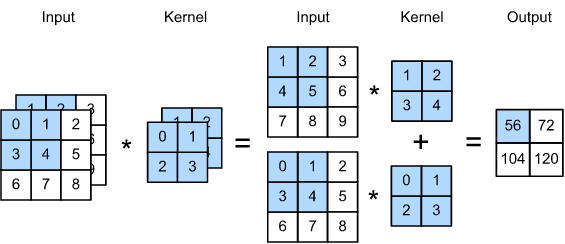

为了加深理解，我们将多输入通道互相关运算实现一下。
简而言之，我们所做的就是对每个通道执行互相关操作，然后将结果相加。

In [15]:
import tensorflow as tf
from d2l import tensorflow as d2l

def corr2d_multi_in(X, K):
    # 先遍历 “X” 和 “K” 的第0个维度（通道维度），再把它们加在一起
    return tf.reduce_sum([d2l.corr2d(x, k) for x, k in zip(X, K)], axis=0)

我们可以构造与 :numref:`fig_conv_multi_in` 中的值相对应的输入张量 `X` 和核张量 `K`，以验证互相关运算的输出。


In [16]:
X = tf.constant([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
                 [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])
K = tf.constant([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])

corr2d_multi_in(X, K)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 56.,  72.],
       [104., 120.]], dtype=float32)>

## 多输出通道




到目前为止，不论有多少输入通道，我们还只有一个输出通道。然而，正如我们在 :numref:`subsec_why-conv-channels` 中所讨论的，每一层有多个输出通道是至关重要的。在最流行的神经网络架构中，随着神经网络层数的加深，我们常会增加输出通道的维数，通过减少空间分辨率以获得更大的通道深度。直观地说，我们可以将每个通道看作是对不同特征的响应。而现实可能更为复杂一些，因为每个通道不是独立学习的，而是为了共同使用而优化的。因此，多输出通道并不仅是学习多个单通道的检测器。

用 $c_i$ 和 $c_o$ 分别表示输入和输出通道的数目，并让 $k_h$ 和 $k_w$ 为卷积核的高度和宽度。为了获得多个通道的输出，我们可以为每个输出通道创建一个形状为 $c_i\times k_h\times k_w$ 的卷积核张量，这样卷积核的形状是 $c_o\times c_i\times k_h\times k_w$。在互相关运算中，每个输出通道先获取所有输入通道，再以对应该输出通道的卷积核计算出结果。

如下所示，我们实现一个计算多个通道的输出的互相关函数。

In [17]:
def corr2d_multi_in_out(X, K):
    # 迭代“K”的第0个维度，每次都对输入“X”执行互相关运算。
    # 最后将所有结果都叠加在一起
    return tf.stack([corr2d_multi_in(X, k) for k in K], 0)

通过将核张量 `K` 与 `K+1` （ `K` 中每个元素加 $1$ ）和 `K+2` 连接起来，构造了一个具有$3$个输出通道的卷积核。


In [18]:
K = tf.stack((K, K + 1, K + 2), 0)
K.shape

TensorShape([3, 2, 2, 2])

下面，我们对输入张量 `X` 与卷积核张量 `K` 执行互相关运算。现在的输出包含 $3$ 个通道，第一个通道的结果与先前输入张量 `X` 和多输入单输出通道的结果一致。


In [19]:
corr2d_multi_in_out(X, K)

<tf.Tensor: shape=(3, 2, 2), dtype=float32, numpy=
array([[[ 56.,  72.],
        [104., 120.]],

       [[ 76., 100.],
        [148., 172.]],

       [[ 96., 128.],
        [192., 224.]]], dtype=float32)>

## $1\times 1$ 卷积层

$1 \times 1$ 卷积，即 $k_h = k_w = 1$，看起来似乎没有多大意义。毕竟，卷积的本质是有效提取相邻像素间的相关特征，而 $1 \times 1$ 卷积显然没有此作用。
尽管如此，$1 \times 1$ 仍然十分流行，时常包含在复杂深层网络的设计中。下面，让我们详细地解读一下它的实际作用。

因为使用了最小窗口，$1\times 1$ 卷积失去了卷积层的特有能力——在高度和宽度维度上，识别相邻元素间相互作用的能力。
而 $1\times 1$ 卷积的唯一计算发生在通道上。

:numref:`fig_conv_1x1` 展示了使用 $1\times 1$ 卷积核与 $3$ 个输入通道和 $2$ 个输出通道的互相关计算。
这里输入和输出具有相同的高度和宽度，输出中的每个元素都是从输入图像中同一位置的元素的线性组合。
我们可以将 $1\times 1$ 卷积层看作是在每个像素位置应用的全连接层，以 $c_i$ 个输入值转换为 $c_o$ 个输出值。
因为这仍然是一个卷积层，所以跨像素的权重是一致的。
同时，$1\times 1$ 卷积层需要的权重维度为 $c_o\times c_i$ ，再额外加上一个偏置。


![互相关计算使用了具有3个输入通道和2个输出通道的 $1\times 1$ 卷积核。其中，输入和输出具有相同的高度和宽度。](../img/conv-1x1.svg)
:label:`fig_conv_1x1`

下面，我们使用全连接层实现 $1 \times 1$ 卷积。
请注意，我们需要对输入和输出的数据形状进行微调。


In [20]:
def corr2d_multi_in_out_1x1(X, K):
    c_i, h, w = X.shape
    c_o = K.shape[0]
    X = tf.reshape(X, (c_i, h * w))
    K = tf.reshape(K, (c_o, c_i))
    Y = tf.matmul(K, X)  # 全连接层中的矩阵乘法
    return tf.reshape(Y, (c_o, h, w))

当执行 $1\times 1$ 卷积运算时，上述函数相当于先前实现的互相关函数`corr2d_multi_in_out`。让我们用一些样本数据来验证这一点。


In [21]:
X = tf.random.normal((3, 3, 3), 0, 1)
K = tf.random.normal((2, 3, 1, 1), 0, 1)

In [22]:
Y1 = corr2d_multi_in_out_1x1(X, K)
Y2 = corr2d_multi_in_out(X, K)
assert float(tf.reduce_sum(tf.abs(Y1 - Y2))) < 1e-6

## 小结

* 多输入多输出通道可以用来扩展卷积层的模型。
* 当以每像素为基础应用时，$1\times 1$ 卷积层相当于全连接层。
* $1\times 1$ 卷积层通常用于调整网络层的通道数量和控制模型复杂性。

## 练习

1. 假设我们有两个卷积核，大小分别为 $k_1$ 和 $k_2$（中间没有非线性激活函数）。
    1. 证明运算可以用单次卷积来表示。
    1. 这个等效的单卷积的维数是多少呢？
    1. 反之亦然吗？
1. 假设输入为 $c_i\times h\times w$，卷积核大小为 $c_o\times c_i\times k_h\times k_w$，填充为 $(p_h, p_w)$，步幅为 $(s_h, s_w)$。
    1. 正向传播的计算成本（乘法和加法）是多少？
    1. 内存占用是多少？
    1. 反向传播的内存占用是多少？
    1. 反向传播的计算成本是多少？
1. 如果我们将输入通道 $c_i$ 和输出通道 $c_o$ 的数量加倍，计算数量会增加多少？如果我们把填充数量翻一番会怎么样？
1. 如果卷积核的高度和宽度是 $k_h=k_w=1$，前向传播的计算复杂度是多少？
1. 本节最后一个示例中的变量 `Y1` 和 `Y2` 是否完全相同？为什么？
1. 当卷积窗口不是 $1\times 1$ 时，如何使用矩阵乘法实现卷积？


# 池化层


通常当我们处理图像时，我们希望逐渐降低隐藏表示的空间分辨率，聚集信息，这样的随着我们在神经网络中层叠的上升，每个神经元对其敏感的感受野（输入）就越大。

而我们的机器学习任务通常会跟全局图像的问题有关（例如，“图像是否包含一只猫呢？”）， 所以我们最后一层的神经元应该对整个输入的全局敏感。通过逐渐聚合信息，生成越来越粗糙的映射，最终实现学习全局表示的目标，同时将卷积图层的所有优势保留在中间层。

此外，当检测较底层的特征时（例如 :numref:`sec_conv_layer` 中所讨论的边缘），我们通常希望这些特征保持某种程度上的平移不变性。例如，如果我们拍摄黑白之间轮廓清晰的图像 `X`，并将整个图像向右移动一个像素，即 `Z[i, j] = X[i, j + 1]`，则新图像 `Z` 的输出可能大不相同。而在现实中，随着拍摄角度的移动，任何物体几乎不可能发生在同一像素上。即使用三脚架拍摄一个静止的物体，由于快门的移动而引起的相机振动，可能会使所有物体左右移动一个像素（除了高端相机配备了特殊功能来解决这个问题）。

本节将介绍 *池化*（pooling）层，它具有双重目的：降低卷积层对位置的敏感性，同时降低对空间降采样表示的敏感性。


## 最大池化层和平均池化层

与卷积层类似，池化层运算符由一个固定形状的窗口组成，该窗口根据其步幅大小在输入的所有区域上滑动，为固定形状窗口（有时称为 *池化窗口*）遍历的每个位置计算一个输出。
然而，不同于卷积层中的输入与卷积核之间的互相关计算，池化层不包含参数。
相反，池运算符是确定性的，我们通常计算池化窗口中所有元素的最大值或平均值。这些操作分别称为 *最大池化层* （maximum pooling）和 *平均池化层* （average pooling）。

在这两种情况下，与互相关运算符一样，池化窗口从输入张量的左上角开始，从左到右、从上到下的在输入张量内滑动。在池化窗口到达的每个位置，它计算该窗口中输入子张量的最大值或平均值，具体取决于是使用了最大池化层还是平均池化层。


![池化窗口形状为 $2\times 2$ 的最大池化层。着色部分是第一个输出元素，以及用于计算这个输出的输入元素: $\max(0, 1, 3, 4)=4$.](http://d2l.ai/_images/pooling.svg)
:label:`fig_pooling`

:numref:`fig_pooling` 中的输出张量的高度为 $2$，宽度为 $2$。这四个元素为每个池化窗口中的最大值：

$$
\max(0, 1, 3, 4)=4,\\
\max(1, 2, 4, 5)=5,\\
\max(3, 4, 6, 7)=7,\\
\max(4, 5, 7, 8)=8.\\
$$

池化窗口形状为 $p \times q$ 的池化层称为 $p \times q$ 池化层，池化操作称为 $p \times q$ 池化。

回到本节开头提到的对象边缘检测示例，现在我们将使用卷积层的输出作为 $2\times 2$ 最大池化的输入。
设置卷积层输入为 `X`，池化层输出为 `Y`。
无论 `X[i, j]` 和 `X[i, j + 1]` 的值是否不同，或 `X[i, j + 1]` 和 `X[i, j + 2]` 的值是否不同，池化层始终输出 `Y[i, j] = 1`。
也就是说，使用 $2\times 2$ 最大池化层，即使在高度或宽度上移动一个元素，卷积层仍然可以识别到模式。

在下面的代码中的 `pool2d` 函数，实现了池化层的正向传播。
此功能类似于 :numref:`sec_conv_layer` 中的 `corr2d` 函数。
然而，这里我们没有卷积核，输出为输入中每个区域的最大值或平均值。


In [23]:
import tensorflow as tf

def pool2d(X, pool_size, mode='max'):
    p_h, p_w = pool_size
    Y = tf.Variable(tf.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1)))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j].assign(tf.reduce_max(X[i:i + p_h, j:j + p_w]))
            elif mode == 'avg':
                Y[i, j].assign(tf.reduce_mean(X[i:i + p_h, j:j + p_w]))
    return Y

我们可以构建 :numref:`fig_pooling` 中的输入张量 `X`，验证二维最大池化层的输出。


In [24]:
X = tf.constant([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
pool2d(X, (2, 2))

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[4., 5.],
       [7., 8.]], dtype=float32)>

此外，我们还可以验证平均池化层。


In [25]:
pool2d(X, (2, 2), 'avg')

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

## 填充和步幅

与卷积层一样，池化层也可以改变输出形状。和以前一样，我们可以通过填充和步幅以获得所需的输出形状。
下面，我们用深度学习框架中内置的二维最大池化层，来演示池化层中填充和步幅的使用。
我们首先构造了一个输入张量 `X`，它有四个维度，其中样本数和通道数都是 1。


In [26]:
X = tf.reshape(tf.range(16, dtype=tf.float32), (1, 4, 4, 1))
X

<tf.Tensor: shape=(1, 4, 4, 1), dtype=float32, numpy=
array([[[[ 0.],
         [ 1.],
         [ 2.],
         [ 3.]],

        [[ 4.],
         [ 5.],
         [ 6.],
         [ 7.]],

        [[ 8.],
         [ 9.],
         [10.],
         [11.]],

        [[12.],
         [13.],
         [14.],
         [15.]]]], dtype=float32)>

默认情况下，深度学习框架中的步幅与池化窗口的大小相同。
因此，如果我们使用形状为 `(3, 3)` 的池化窗口，那么默认情况下，我们得到的步幅形状为 `(3, 3)`。


In [27]:
pool2d = tf.keras.layers.MaxPool2D(pool_size=[3, 3])
pool2d(X)

<tf.Tensor: shape=(1, 1, 1, 1), dtype=float32, numpy=array([[[[10.]]]], dtype=float32)>

填充和步幅可以手动设定。


In [28]:
pool2d = tf.keras.layers.MaxPool2D(pool_size=[3, 3], padding='same',
                                   strides=2)
pool2d(X)

<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[10.],
         [11.]],

        [[14.],
         [15.]]]], dtype=float32)>

当然，我们可以设定一个任意大小的矩形池化窗口，并分别设定填充和步幅的高度和宽度。


In [29]:
pool2d = tf.keras.layers.MaxPool2D(pool_size=[2, 3], padding='same',
                                   strides=(2, 3))
pool2d(X)

<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[ 5.],
         [ 7.]],

        [[13.],
         [15.]]]], dtype=float32)>

## 多个通道

在处理多通道输入数据时，池化层在每个输入通道上单独运算，而不是像卷积层一样在通道上对输入进行汇总。
这意味着池化层的输出通道数与输入通道数相同。
下面，我们将在通道维度上连结张量 `X` 和 `X + 1`，以构建具有 2 个通道的输入。


In [30]:
X = tf.reshape(tf.stack([X, X + 1], 0), (1, 2, 4, 4))

如下所示，池化后输出通道的数量仍然是 2。


In [31]:
pool2d = tf.keras.layers.MaxPool2D(3, padding='same', strides=2)
pool2d(X)

<tf.Tensor: shape=(1, 1, 2, 4), dtype=float32, numpy=
array([[[[ 9., 10., 11., 12.],
         [13., 14., 15., 16.]]]], dtype=float32)>

## 小结

* 对于给定输入元素，最大池化层会输出该窗口内的最大值，平均池化层会输出该窗口内的平均值。
* 池化层的主要优点之一是减轻卷积层对位置的过度敏感。
* 我们可以指定池化层的填充和步幅。
* 使用最大池化层以及大于 1 的步幅，可减少空间维度（如高度和宽度）。
* 池化层的输出通道数与输入通道数相同。


## 练习

1. 你能将平均池化层作为卷积层的特殊情况实现吗？
1. 你能将最大池化层作为卷积层的特殊情况实现吗？
1. 假设池化层的输入大小为 $c\times h\times w$，则池化窗口的形状为 $p_h\times p_w$，填充为 $(p_h, p_w)$，步幅为 $(s_h, s_w)$。这个池化层的计算成本是多少？
1. 为什么最大池化层和平均池化层的工作方式不同？
1. 我们是否需要最小池化层？可以用已知函数替换它吗？
1. 除了平均池化层和最大池化层，是否有其它函数可以考虑（提示：回忆 `softmax` ）？为什么它可能不受欢迎？


# 卷积神经网络（LeNet）

## LeNet

总体来看，LeNet (LeNet-5) 由两个部分组成：

* 卷积编码器：由两个卷积层组成;
* 全连接层密集块：由三个全连接层组成。

该结构在 :numref:`img_lenet` 中所展示。

![LeNet中的数据流。输入是手写数字，输出为10种可能结果的概率。](http://d2l.ai/_images/lenet.svg)
:label:`img_lenet`

每个卷积块中的基本单元是一个卷积层、一个 sigmoid 激活函数和平均池化层。请注意，虽然 ReLU 和最大池化层更有效，但它们在20世纪90年代还没有出现。每个卷积层使用 $5\times 5$ 卷积核，这些层将输入映射到多个二维特征输出，通常同时增加通道的数量。第一卷积层有 6 个输出通道，而第二个卷积层有 16 个输出通道。每个 $2\times2$ 池操作（步骤2）通过空间下采样将维数减少 4 倍。卷积的输出形状由批量大小、通道数、高度、宽度决定。

为了将卷积块的输出传递给稠密块，我们必须在小批量中展平每个样本。换言之，我们将这个四维输入转换成全连接层所期望的二维输入。这里的二维表示的第一个维度索引小批量中的样本，第二个维度给出每个样本的平面向量表示。LeNet 的稠密块有三个全连接层，分别有 120、84 和 10 个输出。因为我们仍在执行分类，所以输出层的 10 维对应于最后输出结果的数量。

通过下面的 LeNet 代码，你会相信用深度学习框架实现此类模型非常简单。我们只需要实例化一个 `Sequential` 块并将需要的层连接在一起。


In [32]:
import tensorflow as tf
from d2l import tensorflow as d2l

def net():
    return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid',
                               padding='same'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=16, kernel_size=5,
                               activation='sigmoid'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='sigmoid'),
        tf.keras.layers.Dense(84, activation='sigmoid'),
        tf.keras.layers.Dense(10)])

我们对原始模型做了一点小改动，去掉了最后一层的高斯激活。除此之外，这个网络与最初的 LeNet-5 一致。

下面，我们将一个大小为 $28 \times 28$ 的单通道（黑白）图像通过 LeNet。 通过在每一层打印输出的形状，我们可以检查模型，以确保其操作与我们期望的 :numref:`img_lenet_vert` 一致。

![LeNet 的简化版。](../img/lenet-vert.svg)
:label:`img_lenet_vert`


In [33]:
X = tf.random.uniform((1, 28, 28, 1))
for layer in net().layers:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: \t', X.shape)

Conv2D output shape: 	 (1, 28, 28, 6)
AveragePooling2D output shape: 	 (1, 14, 14, 6)
Conv2D output shape: 	 (1, 10, 10, 16)
AveragePooling2D output shape: 	 (1, 5, 5, 16)
Flatten output shape: 	 (1, 400)
Dense output shape: 	 (1, 120)
Dense output shape: 	 (1, 84)
Dense output shape: 	 (1, 10)


请注意，在整个卷积块中，与上一层相比，每一层特征的高度和宽度都减小了。
第一个卷积层使用 2 个像素的填充，来补偿 $5 \times 5$ 卷积核导致的特征减少。
相反，第二个卷积层没有填充，因此高度和宽度都减少了 4 个像素。
随着层叠的上升，通道的数量从输入时的 1 个，增加到第一个卷积层之后的 6 个，再到第二个卷积层之后的 16 个。
同时，每个池化层的高度和宽度都减半。最后，每个全连接层减少维数，最终输出一个维数与结果分类数相匹配的输出。


## 模型训练

现在我们已经实现了 LeNet ，让我们看看这个模型在 Fashion-MNIST 数据集上的表现。


In [34]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)

4423680/4422102 [==============================] - 0s 0us/step


虽然卷积神经网络的参数较少，但与深度的多层感知机相比，它们的计算成本仍然很高，因为每个参数都参与更多的乘法。
如果你有机会使用GPU，可以用它加快训练。


为了使用 GPU，我们还需要一点小改动。
与 :numref:`sec_softmax_scratch` 中定义的 `train_epoch_ch3` 不同，在进行正向和反向传播之前，我们需要将每一小批量数据移动到我们指定的设备（例如 GPU）上。

如下所示，训练函数 `train_ch6` 也类似于 :numref:`sec_softmax_scratch` 中定义的 `train_ch3` 。
由于我们将实现多层神经网络，因此我们将主要使用高级 API。
以下训练函数假定从高级 API 创建的模型作为输入，并进行相应的优化。
我们使用在 :numref:`subsec_xavier` 中介绍的 Xavier 随机初始化模型参数。
与全连接层一样，我们使用交叉熵损失函数和小批量随机梯度下降。


In [35]:
class TrainCallback(tf.keras.callbacks.Callback):  #@save
    """A callback to visiualize the training progress."""
    def __init__(self, net, train_iter, test_iter, num_epochs, device_name):
        self.timer = d2l.Timer()
        self.animator = d2l.Animator(
            xlabel='epoch', xlim=[1, num_epochs],
            legend=['train loss', 'train acc', 'test acc'])
        self.net = net
        self.train_iter = train_iter
        self.test_iter = test_iter
        self.num_epochs = num_epochs
        self.device_name = device_name

    def on_epoch_begin(self, epoch, logs=None):
        self.timer.start()

    def on_epoch_end(self, epoch, logs):
        self.timer.stop()
        test_acc = self.net.evaluate(self.test_iter, verbose=0,
                                     return_dict=True)['accuracy']
        metrics = (logs['loss'], logs['accuracy'], test_acc)
        self.animator.add(epoch + 1, metrics)
        if epoch == self.num_epochs - 1:
            batch_size = next(iter(self.train_iter))[0].shape[0]
            num_examples = batch_size * tf.data.experimental.cardinality(
                self.train_iter).numpy()
            print(f'loss {metrics[0]:.3f}, train acc {metrics[1]:.3f}, '
                  f'test acc {metrics[2]:.3f}')
            print(f'{num_examples / self.timer.avg():.1f} examples/sec on '
                  f'{str(self.device_name)}')

#@save
def train_ch6(net_fn, train_iter, test_iter, num_epochs, lr, device):
    """Train a model with a GPU (defined in Chapter 6)."""
    device_name = device._device_name
    strategy = tf.distribute.OneDeviceStrategy(device_name)
    with strategy.scope():
        optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
        net = net_fn()
        net.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    callback = TrainCallback(net, train_iter, test_iter, num_epochs,
                             device_name)
    net.fit(train_iter, epochs=num_epochs, verbose=0, callbacks=[callback])
    return net

现在，我们训练和评估 LeNet-5 模型。


loss 0.473, train acc 0.822, test acc 0.819
2214.4 examples/sec on /CPU:0


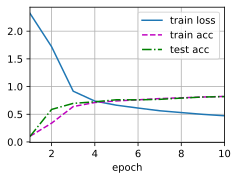

In [36]:
lr, num_epochs = 0.9, 10
train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

## 小结

* 卷积神经网络（CNN）是一类使用卷积层的网络。
* 在卷积神经网络中，我们组合使用卷积层、非线性激活函数和池化层。
* 为了构造高性能的卷积神经网络，我们通常对卷积层进行排列，逐渐降低其表示的空间分辨率，同时增加通道数。
* 在传统的卷积神经网络中，卷积块编码得到的表征在输出之前需由一个或多个全连接层进行处理。
* LeNet是最早发布的卷积神经网络之一。

## 练习

1. 将平均池化层替换为最大池化层，会发生什么？
1. 尝试构建一个基于 LeNet 的更复杂的网络，以提高其准确性。
    1. 调整卷积窗口大小。
    1. 调整输出通道的数量。
    1. 调整激活函数（如 ReLU）。
    1. 调整卷积层的数量。
    1. 调整全连接层的数量。
    1. 调整学习率和其他训练细节（例如，初始化和周期数）。
1. 在 MNIST 数据集上尝试以上改进的网络。
1. 显示不同输入（例如毛衣和外套）时，LeNet 第一层和第二层的激活值。
